# 통계
- 샘플링, 분포, 중심극한 정리, 분산, zscore, outliers
- 그룹 간에 차이가 있는지 통계 추론을 배움
- 명목 변수에 대한 빈도 분석을 배움
- 변수 간 상관관계를 배움

### 변수의 성격
변수의 성격에 따라 적용되는 분석의 방법이 다를 수 밖에 없다<br>
**명목변수 Categorical or nominal variable**은 남녀 성별 과 같이 순서가 없이 이름이 있는 변수를 말함 색깔 또는 지역구<br>
**순위변수 Ordinal variable**은 어떤 순서가 있는 범주에 속하고 그 범주의 이름을 말함. '초등학교', '중학교', '고등학교' 등등<br>
**간격변수 Interval variable** 범주를 등간격으로, 자신의 느낌을 '좋다','보통','안좋다'로 범주화하는 경우<br>
**연속변수 Continuous variable** 키, 몸무게와 같은

In [2]:
import random
#무작위 수는 몸무게와 같이 연속 continuous 또는 주사위에서와 같이 1 ~ 6 값을 가지게 되는 이산적 discrete일 수 있다.

In [3]:
random.seed()
#random.seed(3)
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.1888176821819083
2nd random number on the basis of the seed 0.6583010934949273


#### 분포에서 무작위 수
numpy.random.rand -> 균등분포<br>
numpy.random.randn -> 표준 정규분호(평균=0, 표준편차 = 1)에서 샘플을 추출

In [6]:
import numpy as np
np.random.randn()

1.9398125583154149

In [7]:
#np.random.random_sample, random.sample 모두 균등분포에서 표본을 추출한다.
print (np.random.random_sample((3,2)))#배열의 행과 열

[[0.54939596 0.94808148]
 [0.73216575 0.51650817]
 [0.00345207 0.82324367]]


In [8]:
#random.sample(population, k) 함수는 모집단에서 (정수)샘플 K 개 돌려준다 (바꿔치기 안함).
import random
print (random.sample([1,2,3,4,6], 2))
print (random.sample([1,2,3,4,6], 3))

[4, 1]
[1, 4, 2]


###  균등분포: uniform distrbution
주사위를 던져 나오는 수는 1~6이다. 여기서 얻어지는 주사위 수가 선택될 확률은 동일하므로, 균등분포가 됨

In [9]:
# 샘플링: 100개를 랜덤으로 list 로

In [12]:
# randmo sampling
dice=[]
for i in range(100): 
    dice.append(random.randrange(1,6+1))
print (dice)

[6, 5, 2, 2, 4, 3, 4, 5, 6, 5, 3, 2, 4, 1, 5, 6, 4, 1, 3, 3, 1, 5, 4, 2, 1, 1, 4, 1, 5, 6, 2, 1, 5, 5, 4, 4, 1, 2, 2, 3, 6, 4, 3, 4, 5, 2, 4, 6, 2, 6, 5, 4, 2, 3, 5, 1, 1, 1, 1, 3, 3, 5, 6, 2, 1, 6, 3, 2, 5, 2, 2, 4, 5, 2, 5, 4, 4, 6, 5, 5, 3, 4, 6, 2, 2, 3, 2, 3, 5, 6, 3, 5, 6, 4, 2, 1, 3, 2, 6, 2]


In [13]:
#히스토그램

In [14]:
# bin의 수가 10개라서 주사위 6개가 아님.
for i in range(1,7):
    print("Dice {}: {}회".format(i, dice.count(i)))

Dice 1: 14회
Dice 2: 21회
Dice 3: 15회
Dice 4: 17회
Dice 5: 19회
Dice 6: 14회


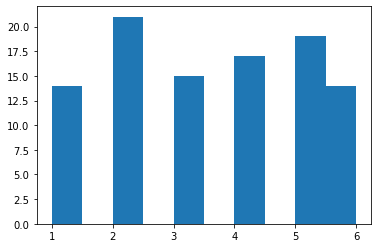

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(dice)
plt.show()

In [16]:
# 마지막이 붙어있음, 앞에서부터 2개의 값을 선택하여 막대가 그려지는데, 마지막 막대를 그리는 경우, 6이상을 넘어가지 못하게 되어서 그럼.
# 이를 교정하기 위해 0.5 부터 시작해서 1씩 증가하도록 구간 bin 을 구성하자 0.5~1.5, 1.5~2.5, ...7개의 값이 필요
import numpy as np
np.arange(0.5, 7)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

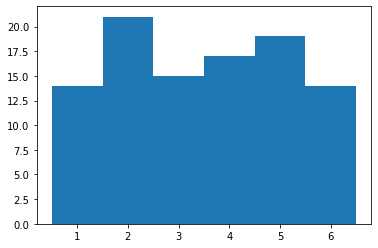

In [17]:
plt.hist(dice, bins = np.arange(0.5, 7))
plt.show()

In [18]:
#Pandas로 그려보자.
# 출력의 결과가 더 이쁨
# Series 일련의 숫자로 나타냄 Series 로 하고 있단거에 초점.

<AxesSubplot:>

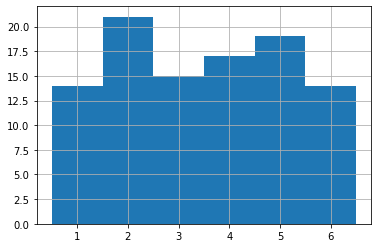

In [19]:
#numpy array를 pandas의 Series로 변환하고, hist() 함수를 사용하면 된다. 
#Pandas Series는 컬럼이라고 보면 된다. 
#컬럼을 1차원으로 저장한 값이다. 정수, 문자, 소수 등 어떤 값이든 상관없다.
import pandas as pd
pd.Series(dice).hist(bins = np.arange(0.5, 7))

###  describe
통계량을 구해보자. describe()는 기술통계량 평균, 최소값, 최대값, 표준편차, 건수를 출력한다. DataFrame 또는 컬럼을 Series로 변환한 후 describe()를 적용할 수 있다.

In [20]:
import pandas as pd

s=pd.Series(dice)
print (s.describe())

count    100.000000
mean       3.480000
std        1.660473
min        1.000000
25%        2.000000
50%        3.500000
75%        5.000000
max        6.000000
dtype: float64


### 정규분포
종모양, 좌우 대칭의 종 모양으로 생긴 분포. 평균을 중심으로 데이터가 집중해 있음
<br>
무작위 변수 x가 있다고 하자. x는 정규분포를 따른다고 하며,
평균 $\mu$, 표준편차 $\sigma$를 가지게 된다.
즉, $ X \sim N (\mu, \sigma)$
무작위 수를 생성하는 함수는:
* random.gauss(mu,sigma)
* random.normalvariate(mu,sigma) - gauss보다 약간 빠름.

참고로 다른 분포에서의 샘플링 함수는 다음과 같다.
* random.uniform(a,b)
* random.betavariate(alpha,beta)
* random.expovariate(lamdb)
* random.gammavariate(alpha,beta)

In [21]:
import numpy as np
comp1=np.random.normal(0, 1, size=200) #평균0, 표준편차1

In [22]:
comp1[:5]

array([-0.60086422,  1.2197475 ,  0.79764507, -0.11105899, -0.49021116])

In [23]:
comp2=np.random.normal(10, 2, size=200)

In [24]:
# 히스토그램 randn() 을 사용해서 histogram 그래프로 그려보자

In [25]:
x=np.random.randn(100)

In [26]:
#histogram은 bin(interval)과 bin에 속하는 값을 반환한다. 
#histogram(x)를 실행하면 2개의 행렬이 반환된다.
count, binends = np.histogram(x)

In [27]:
print(count) #표준편차의 값
print(binends)
print(x)

[ 6  3 14 17 21 12 11  6  7  3]
[-2.24520724 -1.80735259 -1.36949794 -0.93164328 -0.49378863 -0.05593398
  0.38192067  0.81977532  1.25762998  1.69548463  2.13333928]
[-0.83986274 -1.25092726 -0.85934386 -0.22935742 -0.61816469 -0.28308745
 -0.30608687 -0.38273167  1.55202928 -1.14459934  0.1170511  -2.22928023
 -0.66009369 -0.60638666  0.55150973  0.55708277  2.13333928  0.18846385
  0.08648192  0.75787763 -0.55007629 -1.05584145  0.00308596  1.16493055
 -1.50838385 -0.24668253 -1.18809    -0.35427082 -0.56671871 -1.55228286
  0.53532012 -1.46995789  1.03817094  1.2637649  -0.02537971 -1.0238546
  0.80444089  0.28628024  1.76683093 -0.86077661 -0.46792436  0.33513452
 -0.78649517 -0.46386903  0.69884917 -0.99944557  0.22443636  0.39437013
 -0.45303632 -0.33943037 -0.03449657 -1.83573089  1.52352407  0.12866119
 -0.08994196 -0.33981522 -2.24520724 -2.20079849 -1.29546277  0.60490225
  0.35188423 -2.09063417  1.13029722 -0.50109047 -0.42310953  0.90696823
 -0.27239847 -1.05568022  1.700

(array([ 6.,  3., 14., 17., 21., 12., 11.,  6.,  7.,  3.]),
 array([-2.24520724, -1.80735259, -1.36949794, -0.93164328, -0.49378863,
        -0.05593398,  0.38192067,  0.81977532,  1.25762998,  1.69548463,
         2.13333928]),
 <BarContainer object of 10 artists>)

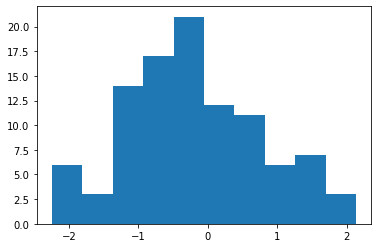

In [28]:
#numpy의 histogram()은 그래프를 생성하지 않으므로, 그림을 그리려면 hist(x)를 실행한다.
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(x)

In [ ]:
pandas 로 hist. 
앞서 생성했던 comp1, comp2를 묶어서 하나의 Series로 만들어 hist()를 호출하고 있다.

<AxesSubplot:>

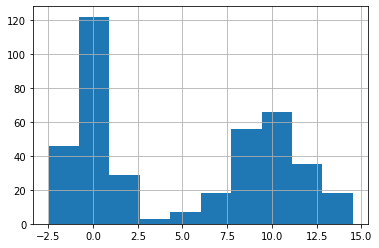

In [29]:
import pandas as pd

values=pd.Series(np.concatenate( [comp1,comp2])) #두개 병합
values.hist()

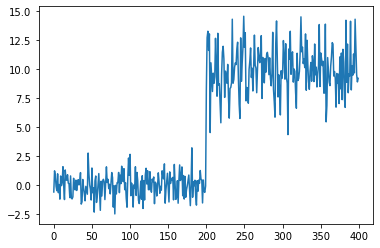

In [30]:
values.plot()
plt.show()

## 중심극한 정리
n>30 : n은 표본의 크기<bR>
   
표본평균의 분포는 정규분포로 수렴하게 된다 이러한 전제에 따라, 통계적 추정을 할 수 있고, z값을 이용해 확률을 계산할 수 있게 된다.표본을 30회 정도하면, 표본평균의 표본분포 (sampling distribution of sample means)는 그 형태가 정규분포에 수렴한다.

In [31]:
x=np.random.randn(100)

In [32]:
print ("mean\t: {}".format(np.mean(x)))
print ("median\t: {}".format(np.median(x)))

mean	: -0.015476210612438828
median	: 0.11656534477462993


In [ ]:
### skewness
분포의 대칭성을 설명하는 지표로 skewness를 계산한다.
- =0 :정규분포
- > 0 : 왼쪽 꼬리가 두퉁, 왼쪽으로 비스듬
- > 0 : 오른쪽 꼬리가 두툼, 오른쪽으로 비스듬

In [33]:
from scipy.stats import skew

print ("skewness\t: {}".format(skew(x)))

skewness	: -0.5587758360203415


In [ ]:
### kurtosis
kurtosis는 분포의 뾰족한 정도를 설명한다.

* = 0 : 정규분포
* > 0 : 뾰족하고, 꼬리가 두툼
* < 0 : 편평하고, 꼬리가 얇음

In [34]:
from scipy.stats import kurtosis

print ("kurtosis\t: {}".format(kurtosis(x)))

kurtosis	: 1.6388124651191474


### spark로 skewness, kurtosis 계산하기

In [35]:
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [50]:
import pandas as pd
xPd=pd.DataFrame(x, columns=['x'], dtype=float)


,x
0,-1.375181
1,-0.232571
2,-0.934500
3,0.928780
4,0.310483
...,...
95,-0.727368
96,-0.691741
97,-0.325934
98,-0.163109


In [37]:
df=spark.createDataFrame(xPd)

In [40]:
from pyspark.sql import functions as f
df.select(f.skewness(df['x']), f.kurtosis(df['x'])).show()
X=x

+-------------------+------------------+
|        skewness(x)|       kurtosis(x)|
+-------------------+------------------+
|-0.5587758360203428|1.6388124651191518|
+-------------------+------------------+



## 분산

In [51]:
print ("simple mean of x = {:.3f}".format(float(sum(X))/len(X)))

simple mean of x = -0.015


In [52]:
import numpy as np

xbar=np.mean(X)
#ybar=np.mean(Y)

In [43]:
print ("numpy mean of X = {:.3f}".format(xbar))

numpy mean of X = -0.015


In [44]:
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/len(X))) # ddof=0

0.9758893520681928


In [45]:
# 보정:  자유도가 1이 됨
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/(len(X)-1))) # ddof=1

0.9808057023373447


In [46]:
sx=np.sqrt(np.var(X,ddof=1))
#sy=np.sqrt(np.var(Y,ddof=1))
#print("sx:",sx, "sy:",sy)

In [47]:
print(np.std(X)) # ddof=0
print(np.std(X, ddof=1))

0.9758893520681929
0.9808057023373447


In [48]:
a = np.array([1,2,3,4,5])
p = np.percentile(a, 50) # return 50th percentile, e.g median.
print (p) # 3

3.0


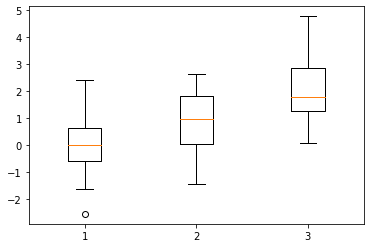

In [49]:
import matplotlib.pyplot as plt

x1 = np.random.normal(0,1,50) # mu=0, sigma=1, n=50
x2 = np.random.normal(1,1,50)
x3 = np.random.normal(2,1,50)
plt.boxplot([x1,x2,x3])
plt.show()
#주황색 선이 평균 검은색 되어있는게 끝 선 들 min, max

In [ ]:
#zscore는 각 측정 값을 평균에서 빼고난 후 표준편차로 나누어 계산된다. 

#이 식을 이해하면, 평균에서 표준편차의 몇 배가 떨어져 있는지를 말한다. 

#표준편차의 배수로 떨어진 정도를 정규화(표준화)한다는 의미가 있다.